In [9]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
# Define dataset paths
train_path = r"V:\Coding_Main\EmotiSense\dataset\train"
test_path = r"V:\Coding_Main\EmotiSense\dataset\test"

# Image generators with rescaling
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

# Load datasets
train_set = train_gen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

test_set = test_gen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [13]:
# Model setup
emotion_model = Sequential()

emotion_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

emotion_model.add(Conv2D(64, (3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

emotion_model.add(Flatten())
emotion_model.add(Dense(128, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(train_set.num_classes, activation='softmax'))

emotion_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
emotion_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 839,047 (3.20 MB)

 Trainable params: 839,047 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
import time
from tensorflow.keras.callbacks import EarlyStopping

# Optional: You can keep early stopping, but it resets every epoch in this loop style
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

total_epochs = 25

# Lists to store metrics across epochs
train_acc = []
val_acc = []

for epoch in range(total_epochs):
    print(f"\n🟢 Starting Epoch {epoch + 1}/{total_epochs}")

    history = emotion_model.fit(
        train_set,
        validation_data=test_set,
        epochs=1,
        verbose=1
    )
    
    # Track accuracy
    train_acc.append(history.history['accuracy'][0])
    val_acc.append(history.history['val_accuracy'][0])
    
    time.sleep(5)

# Save trained model
emotion_model.save("emotion_recognition_model.h5")
print("✅ Model saved successfully as emotion_recognition_model.h5")



🟢 Starting Epoch 1/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.2763 - loss: 1.7782 - val_accuracy: 0.4203 - val_loss: 1.5065

🟢 Starting Epoch 2/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.4097 - loss: 1.5234 - val_accuracy: 0.4592 - val_loss: 1.4062

🟢 Starting Epoch 3/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.4562 - loss: 1.4247 - val_accuracy: 0.4837 - val_loss: 1.3432

🟢 Starting Epoch 4/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.4713 - loss: 1.3587 - val_accuracy: 0.4989 - val_loss: 1.3029

🟢 Starting Epoch 5/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.4995 - loss: 1.3053 - val_accuracy: 0.4986 - val_loss: 1.2944

🟢 Starting Epoch 6/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.5123 - loss: 1.2659 - val_accuracy: 0.5125 - val_loss: 1.2864

🟢 Starting Epoch 7/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.5259 - loss: 1.2281 - val_accuracy: 0.5095 - val_loss: 1.2606

🟢 Sta

✅ Model saved successfully as emotion_recognition_model.h5


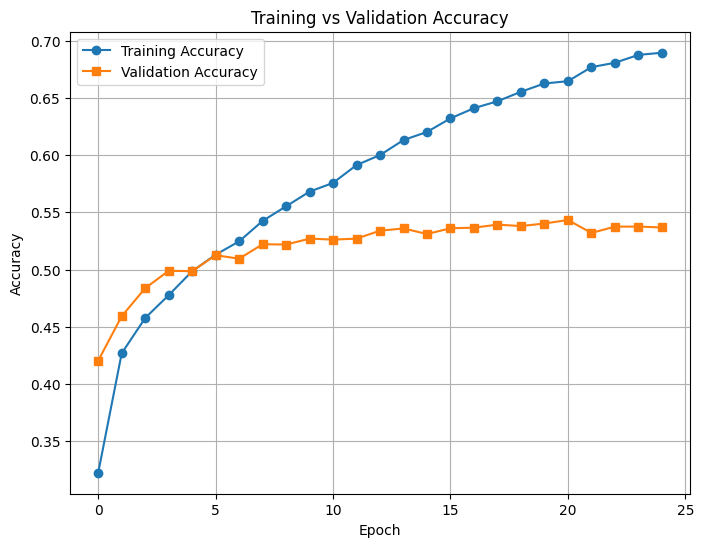

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(train_acc, label='Training Accuracy', marker='o')
plt.plot(val_acc, label='Validation Accuracy', marker='s')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Load trained model
model = load_model("emotion_recognition_model.h5")

# Emotion categories
emotions = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

# Load face detector
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Start webcam feed
camera = cv2.VideoCapture(0)

while True:
    ret, frame = camera.read()
    if not ret:
        break

    grayscale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    detected_faces = face_detector.detectMultiScale(grayscale, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in detected_faces:
        face_crop = grayscale[y:y+h, x:x+w]
        face_resized = cv2.resize(face_crop, (48, 48))
        face_normalized = face_resized / 255.0
        face_input = np.expand_dims(face_normalized, axis=(0, -1))

        predictions = model.predict(face_input, verbose=0)
        emotion_label = emotions[np.argmax(predictions)]

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, emotion_label, (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)

    cv2.imshow("Live Emotion Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

: 